### Neshyba & de Miguel, 2023


# Thermophoretic Forces

## Introduction

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/Thermophoretic forces.jpg" height="500" width="500"/> 
<strong>Figure 1</strong>. Thermophoretic forces.

## Key equations
    
We're assuming the temperature gradient depicted in Fig. 1 is a linear function of the distance $x$, i.e., 

$$
T(z) = T_{cold} + x(T_{hot}-T_{cold}) \ \ \ \ (1)
$$

where $x$ spans a distance of 1 cm. The *partition function* of our system -- a solute dissolved in water -- is given by

$$
Z = \sum_{n} e^{-(E_n-E_{gs}) / k_BT} \ \ \ \ (2)
$$

The *energy* of our system is given by
$$
U = RT^2 {d \over dT} lnZ \ \ \ \ (3)
$$

The *Thermophoretic force* is given by
$$
F = -\Delta U(x) \ \ \ \ (4)
$$

The temperature dependence of the vibrational frequency of our system is assumed to be of sigmoidal form, as shown in Fig. 2,
    
<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/sigmoidomega.jpg" height="400" width="400"/> 
<strong>Figure 2</strong>. Sigmoidal temperature dependence of the vibrational frequency of a solute.

## The idea of this exericse
The idea behind this exercise is to compute the thermophoretic forces acting on a solute (the *system*) dissolved in water (the *surroundings*), using a temperature-dependent formulation. More specifically, the Hamiltonian of the system is assumed to consist of one vibrational mode of the solute, whose vibrational frequency changes in accordance with electronic structure calculations (carried out separately) representing different temperatures of the surroundings.
    
## Learning goals
The main learning goals of this exercise are 
1. I can compute the partition function for vibrational motion according to a harmonic oscillator.
1. I can compute and interpret the resulting thermodynamic energy and thermophoretic forces. 

In [15]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [16]:
# Constants
R = AssignQuantity(8.314e-3,'kjoule/mol/K')
NA = AssignQuantity(6.02e23,'1/mol')
kB = R/NA
c = AssignQuantity(3.0e8,'m/s')
hbar = AssignQuantity(1,'atomic_unit_of_time * hartree'); print(hbar)
h = hbar*2*np.pi; print(h)

1 atomic_unit_of_time * hartree
6.283185307179586 atomic_unit_of_time * hartree


In [17]:
# Specifying the temperature range across our gradient
nx = 500

# These parameters assume the change in vibrational frequencies occurs around 277 K (T of max density of water)
T_low = AssignQuantity(230,'K')
T_high = AssignQuantity(310,'K')
T_transition = AssignQuantity(277,'K')
T_interval = AssignQuantity(4,'K')
nubar0 = AssignQuantity(1014,'1/cm')
nubar_HT = nubar0; print('nubar_HT =', nubar_HT)
LT_enhancement = 4.47
nubar_LT = nubar0*(1 + LT_enhancement/100)

# # Similar, but with a presumed bigger effect on the vibrational frequency
# T_low = AssignQuantity(230,'K')
# T_high = AssignQuantity(310,'K')
# T_transition = AssignQuantity(277,'K')
# T_interval = AssignQuantity(4,'K')
# nubar0 = AssignQuantity(1014,'1/cm')
# nubar_HT = nubar0; print('nubar_HT =', nubar_HT)
# LT_enhancement = 20
# nubar_LT = nubar0*(1 + LT_enhancement/100)

print('nubar at low T=', nubar_LT)
print('nubar at high T=', nubar_HT)

xarray = AssignQuantity(np.linspace(0,1,nx),'cm')
Tarray = np.linspace(T_low,T_high,nx)

nubar_HT = 1014 / centimeter
nubar at low T= 1059.3258 / centimeter
nubar at high T= 1014 / centimeter


In [18]:
nubar0 = AssignQuantity(1014,'1/cm')
nu0 = nubar0*c; nu0.ito('1/s')
omega0 = nu0*(2*np.pi)
print(nubar0)
print(nu0)
print(omega0)

1014 / centimeter
30420000000000.0 / second
191134497044403.0 / second


In [19]:
def Z_HO(omega, T, nmax=20):
    Z = 0
    Zterms = []
    for n in range(0,nmax):
        deltaE = n*hbar*omega
        argument = deltaE/kB/T
        argument.ito('dimensionless')
        nextone = np.exp(-argument)
        Z += nextone
        Zterms = np.append(Zterms,nextone) # For internal use only -- not returned
    return Z

<IPython.core.display.Javascript object>


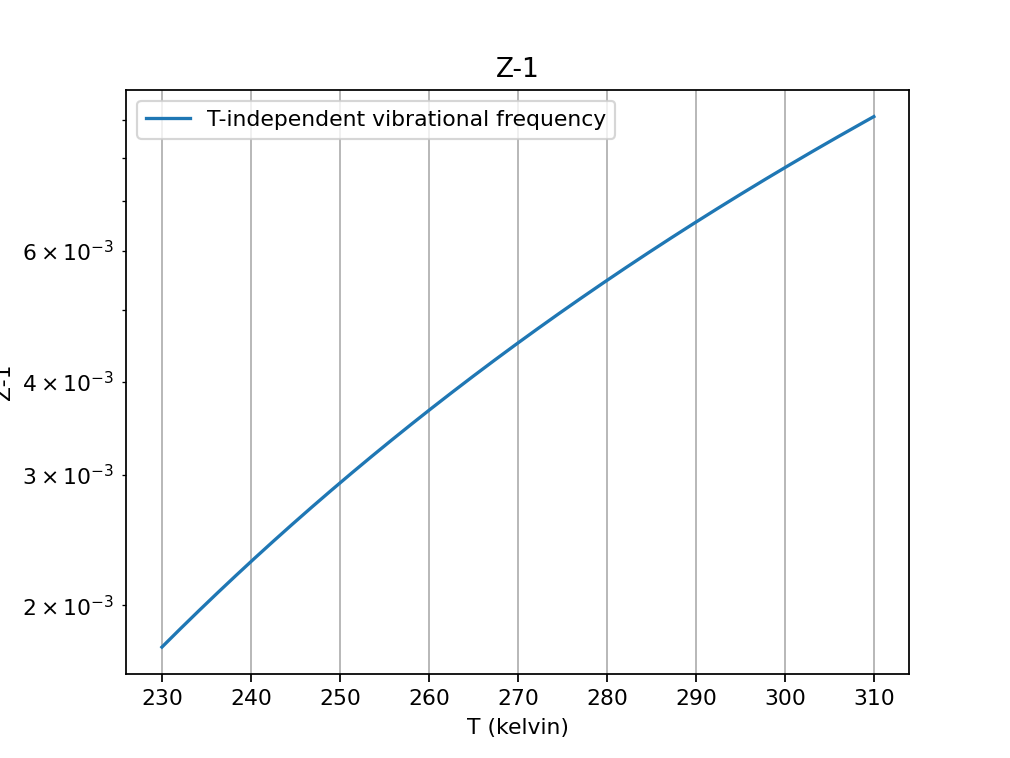

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


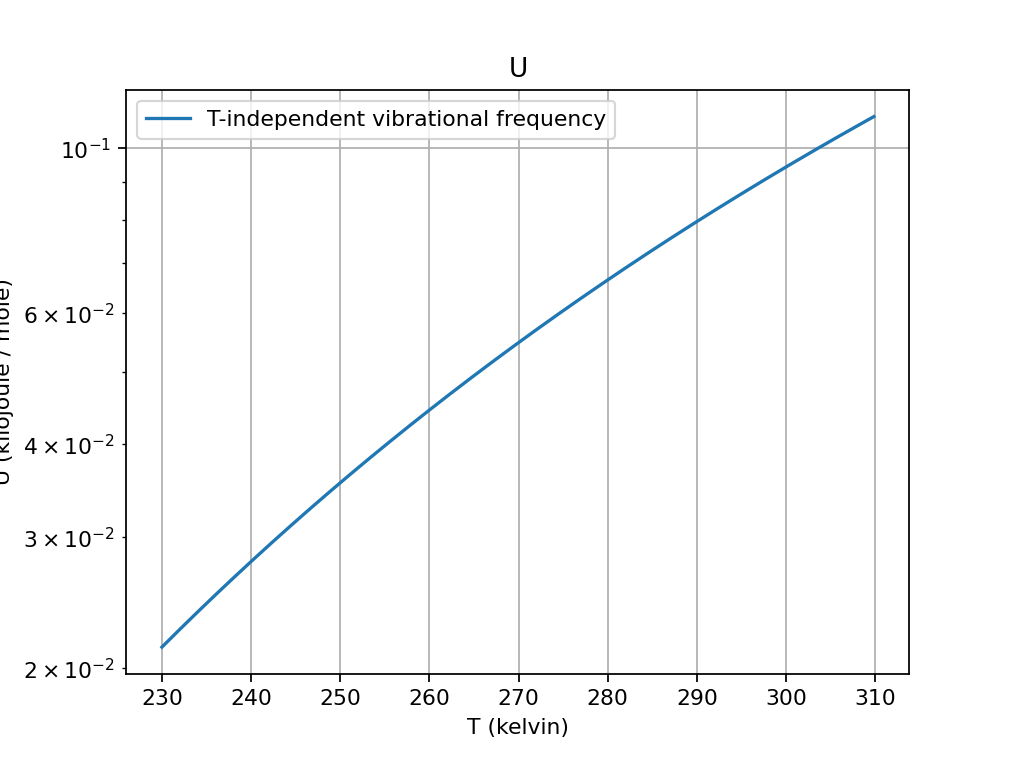

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


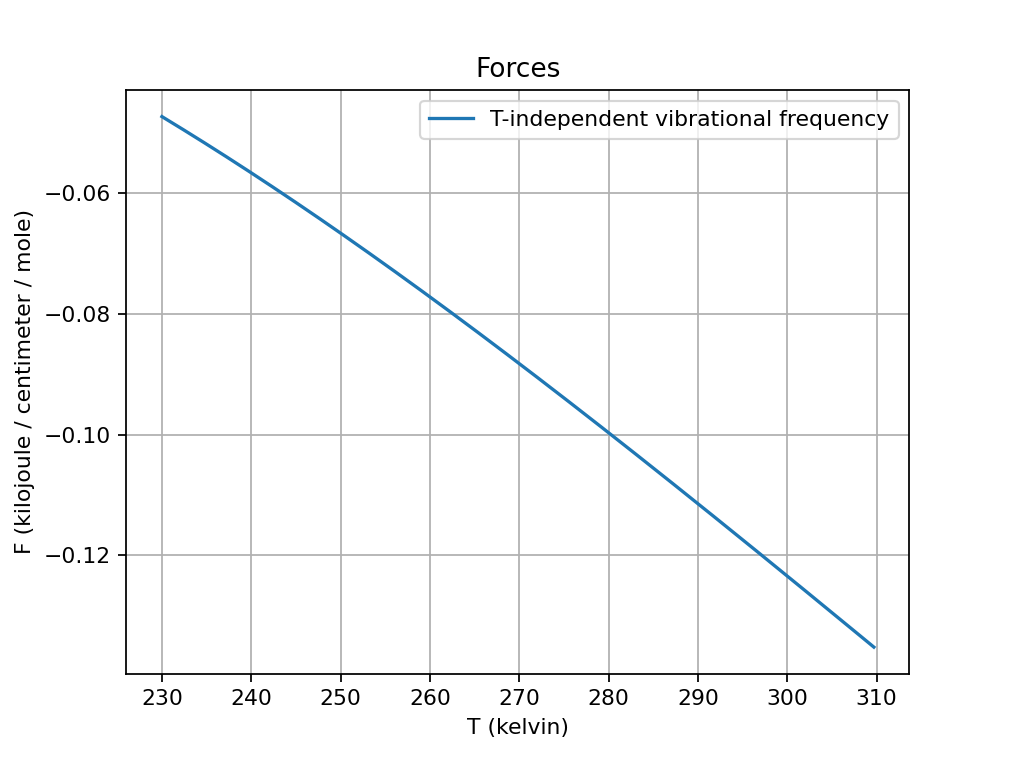

-0.04726859471599644


/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [20]:
# Getting Z(T)
Zarray = []
for T in Tarray:
    Z = Z_HO(omega0,T)
    Zarray = np.append(Zarray,Z)
plt.figure()
plt.semilogy(Tarray,Zarray-1,label='T-independent vibrational frequency')
plt.grid(True)
plt.xlabel('T ('+str(Tarray.units)+')')
plt.ylabel('Z-1')
plt.title('Z-1')
plt.legend()

# Getting U(T)
lnZ = np.log(Zarray)
Uarray = R*Tarray[:-1]**2*np.diff(lnZ)/np.diff(Tarray)
plt.figure()
plt.semilogy(Tarray[:-1],Uarray,label='T-independent vibrational frequency')
plt.grid(True)
plt.xlabel('T ('+str(Tarray.units)+')')
plt.ylabel('U ('+str(Uarray.units)+')')
plt.title('U')
plt.legend()

# Getting F(x)
Farray = -np.diff(Uarray)/np.diff(xarray[0:-1])
plt.figure()
plt.plot(Tarray[:-2],Farray,label='T-independent vibrational frequency')
plt.grid(True)
plt.xlabel('T ('+str(Tarray.units)+')')
plt.ylabel('F ('+str(Farray.units)+')')
plt.title('Forces')
print(np.max(Farray.magnitude))
plt.legend()

<IPython.core.display.Javascript object>


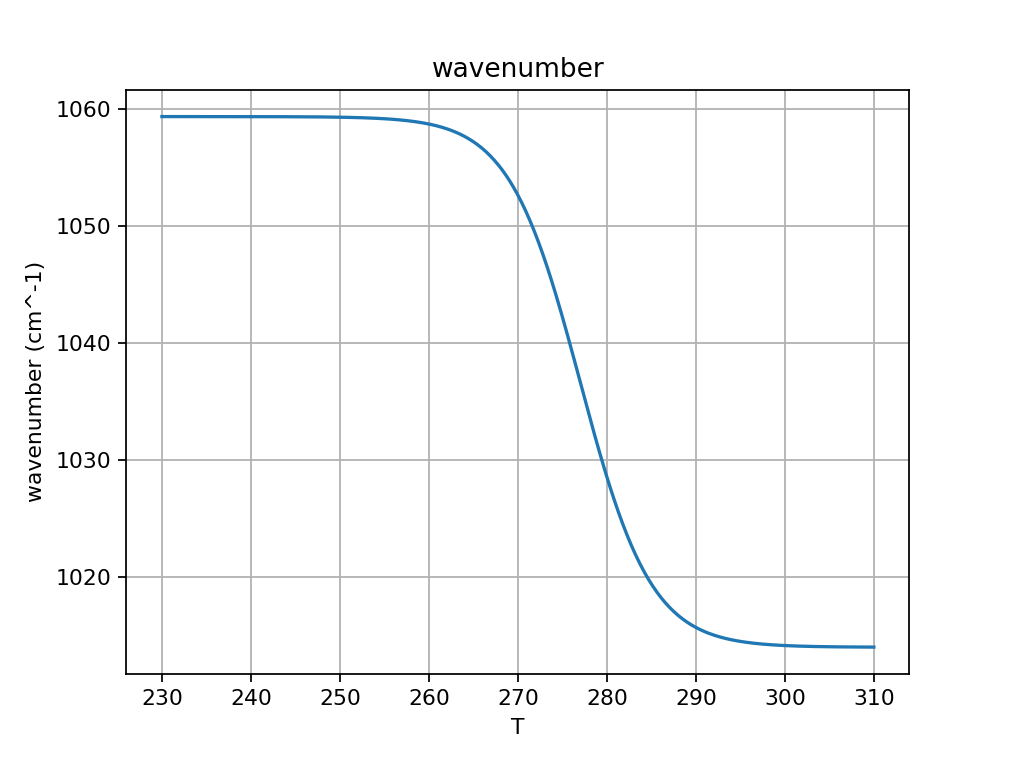

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


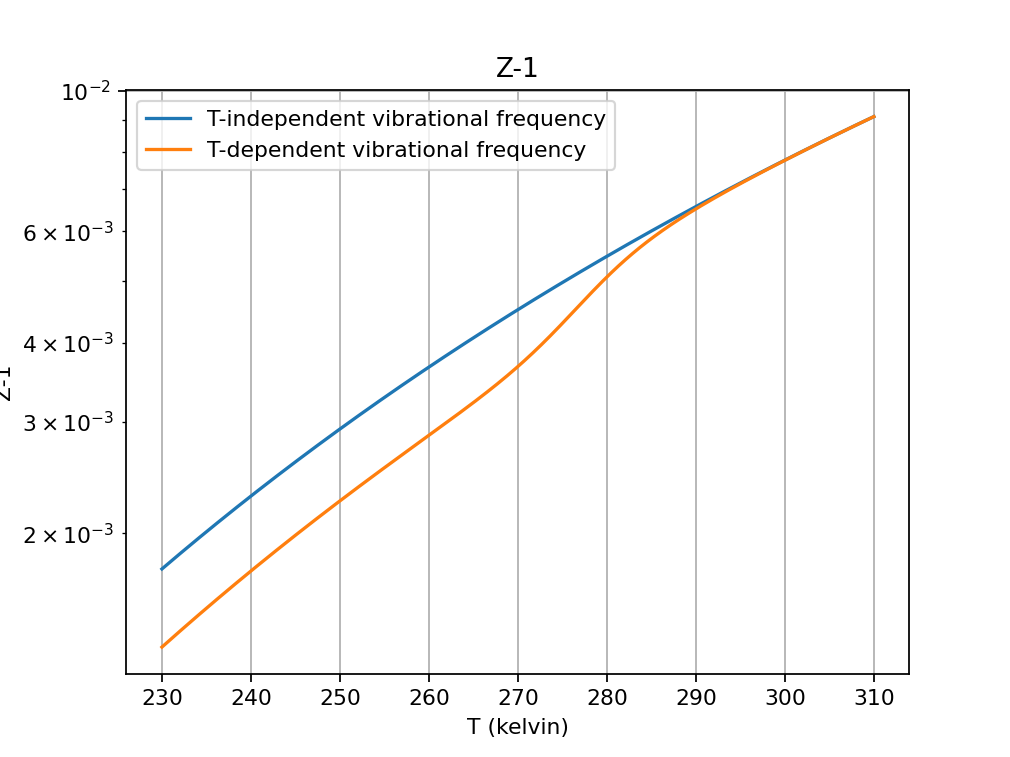

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


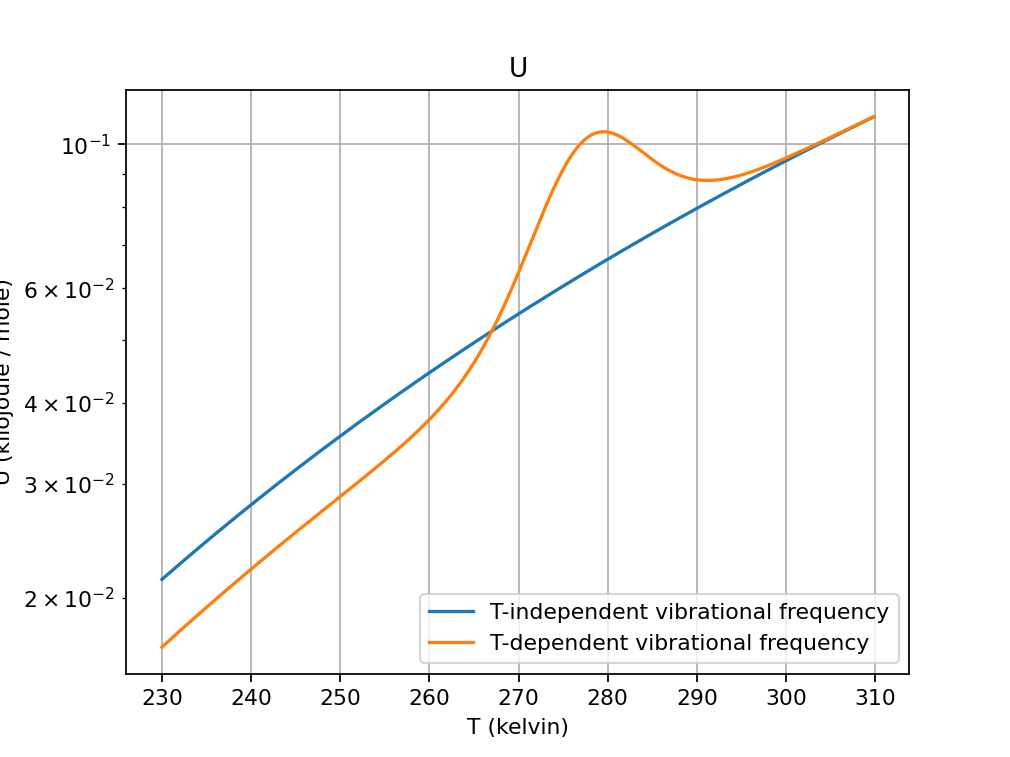

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


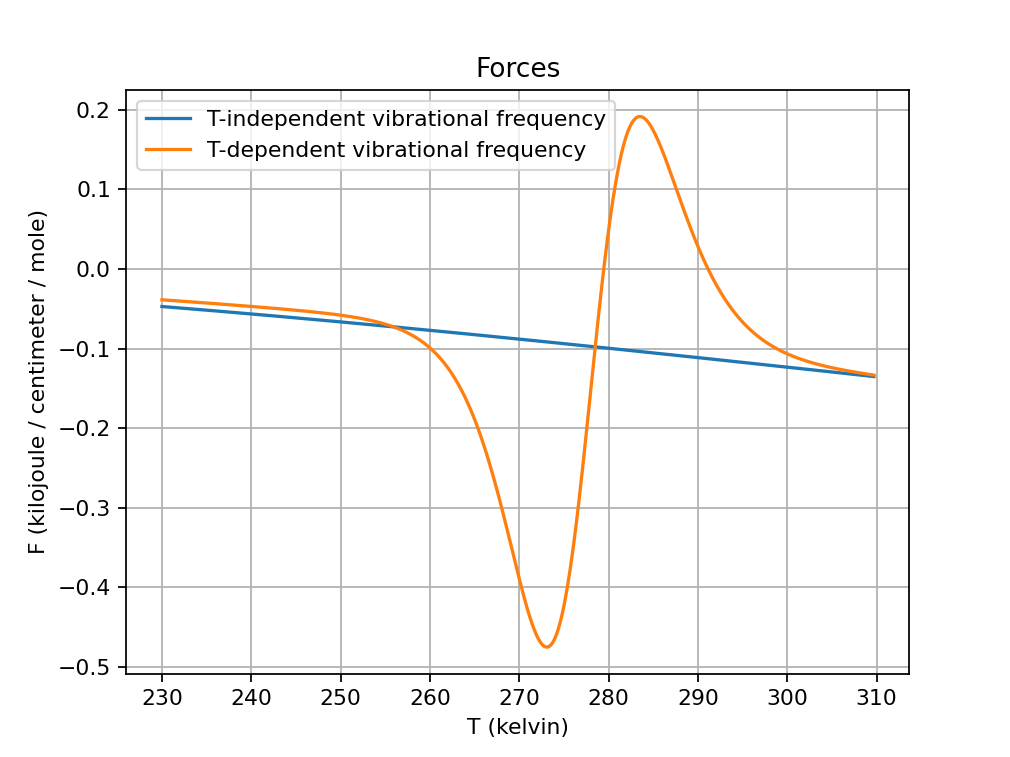

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [21]:
def sigmoid_function(sigmoid_arg):
    """ this function implements the sigmoid function """
    sigmoid = 1 - 1.0/(1.0 + np.exp(-sigmoid_arg))
    return sigmoid

def omega_sigmoid(omega_LT, omega_HT, T, T_transition, T_interval):
    sigmoid_arg = (T-T_transition)/T_interval    
    omega = sigmoid_function(sigmoid_arg)
    omegaarray = omega_HT+(omega_LT-omega_HT)*omega
    return omegaarray

# Getting the wavenumber as a function of T (or equivalently, x)
nubararray = []
for T in Tarray:
    nubararray = omega_sigmoid(nubar_LT, nubar_HT, Tarray, T_transition, T_interval)

# Converting to frequencies
nuarray = nubararray*c; nuarray.ito('1/s')
omegaarray = nuarray*(2*np.pi)
omega_LT = omegaarray[0]
omega_HT = omegaarray[-1]

# Plotting
plt.figure()
plt.plot(Tarray,nubararray)
plt.grid(True)
plt.xlabel('T')
plt.ylabel('wavenumber (cm^-1)')
plt.title('wavenumber')

# Getting Z(T)
Zarray_new = []
for i in range(len(Tarray)):
    T = Tarray[i]
    omega = omega_sigmoid(omega_LT, omega_HT, T, T_transition, T_interval) 
    Z = Z_HO(omega,T)
    Zarray_new = np.append(Zarray_new,Z)
plt.figure()
plt.semilogy(Tarray,Zarray-1,label='T-independent vibrational frequency')
plt.semilogy(Tarray,Zarray_new-1,label='T-dependent vibrational frequency')
plt.grid(True)
plt.xlabel('T ('+str(Tarray.units)+')')
plt.ylabel('Z-1')
plt.title('Z-1')
plt.legend()

# Getting U(T)
lnZ = np.log(Zarray_new)
Uarray_new = R*Tarray[:-1]**2*np.diff(lnZ)/np.diff(Tarray)
plt.figure()
plt.semilogy(Tarray[:-1],Uarray,label='T-independent vibrational frequency')
plt.semilogy(Tarray[:-1],Uarray_new,label='T-dependent vibrational frequency')
plt.grid(True)
plt.xlabel('T ('+str(Tarray.units)+')')
plt.ylabel('U ('+str(Uarray.units)+')')
plt.title('U')
plt.legend()

# Getting F(x)
Farray_new = -np.diff(Uarray_new)/np.diff(xarray[0:-1])
plt.figure()
plt.plot(Tarray[:-2],Farray,label='T-independent vibrational frequency')
plt.plot(Tarray[:-2],Farray_new,label='T-dependent vibrational frequency')
plt.grid(True)
plt.xlabel('T ('+str(Tarray.units)+')')
plt.ylabel('F ('+str(Farray.units)+')')
plt.title('Forces')
plt.legend()

### Refreshing and saving your code
1. Use the dropdown menu Kernel/Restart
2. Use the dropdown menu Cell/Run All Above
3. Under the "File" dropdown menu item in the upper left is a disk icon. Press it now to save your work (you can, do this at any time as you're working on an assignment, actually).

### Validating
This step will help ensure that you didn't miss something (although it's not a guarantee). Find the "Validate" button and press it. If there are any errors or warnings, fix them.

### Finishing up
Assuming all this has gone smoothly, carry out three more steps (but read this carefully before starting):
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page